## Classification using the embeddings

In the classification task we predict one of the predefined categories given an input. We will predict the score based on the embedding of the review's text, where the algorithm is correct only if it guesses the exact number of stars. We split the dataset into a training and a testing set for all the following tasks, so we can realistically evaluate performance on unseen data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

In the following example we're predicting the number of stars in a review, from 1 to 5.

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

datafile_path = "https://cdn.openai.com/API/examples/data/fine_food_reviews_with_embeddings_1k.csv"  # for your convenience, we precomputed the embeddings
df = pd.read_csv(datafile_path)
df["babbage_similarity"] = df.babbage_similarity.apply(eval).apply(np.array)

X_train, X_test, y_train, y_test = train_test_split(
    list(df.babbage_similarity.values), df.Score, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


              precision    recall  f1-score   support

           1       0.52      0.72      0.60        18
           2       1.00      0.35      0.52        17
           3       0.50      0.12      0.20         8
           4       0.75      0.35      0.47        26
           5       0.84      0.99      0.91       131

    accuracy                           0.80       200
   macro avg       0.72      0.51      0.54       200
weighted avg       0.80      0.80      0.76       200



We can see that the model has learnt to distinguish between the categories decently. 5-star reviews show the best performance overall, and this is not too surprising, since they are the most common in the dataset.

RandomForestClassifier() - Average precision score over all classes: 0.91


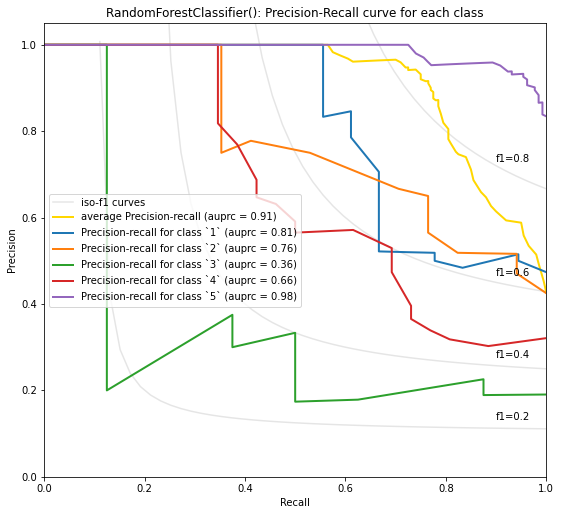

In [2]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)


Unsurprisingly 5-star and 1-star reviews seem to be easier to predict. Perhaps with more data, the nuances between 2-4 stars could be better predicted, but there's also probably more subjectivity in how people use the inbetween scores.